In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import data

In [80]:
from google.colab import files
files.upload()

Saving Final Data.csv to Final Data (1).csv


{'Final Data.csv': b'BMI,Fa. Di,Alchoholic, smoke,Diabetis,Affected Blood, formalin food,Vaccineded,replace  hormone?,abnormalchild\r\nBMI>30,no,no,no,controlled,no,yes,yes,no,22\r\nBMI<30,no,no,no,controlled,no,yes,yes,no,1\r\nBMI>30,no,no,no,controlled,no,yes,yes,no,22\r\nBMI<30,no,no,yes,controlled,no,yes,yes,no,4\r\nBMI<30,no,no,no,controlled,no,no,yes,no,0\r\nBMI<30,no,no,no,controlled,no,yes,yes,no,1\r\nBMI>30,no,no,no,uncontrolled,no,no,yes,no,39\r\nBMI<30,no,no,no,controlled,no,yes,no,no,25\r\nBMI>30,no,no,no,controlled,no,yes,yes,no,22\r\nBMI>30,no,no,no,controlled,no,no,no,no,45\r\nBMI<30,no,no,no,controlled,no,yes,yes,no,1\r\nBMI<30,no,no,no,controlled,no,no,no,no,24\r\nBMI<30,no,yes,no,controlled,no,yes,no,no,28\r\nBMI<30,no,no,yes,controlled,no,yes,yes,no,4\r\nBMI<30,no,no,yes,controlled,no,yes,no,no,28\r\nBMI<30,no,no,no,uncontrolled,no,yes,yes,no,19\r\nBMI<30,no,yes,yes,controlled,no,yes,yes,no,7\r\nBMI<30,no,yes,no,controlled,no,no,no,no,27\r\nBMI>30,no,no,no,controlled

In [81]:
df =pd.read_csv('Final Data.csv')
df.shape

(210, 10)

In [82]:
df

,BMI,Fa. Di,Alchoholic,smoke,Diabetis,Affected Blood,formalin food,Vaccineded,replace hormone?,abnormalchild
0,BMI>30,no,no,no,controlled,no,yes,yes,no,22
1,BMI<30,no,no,no,controlled,no,yes,yes,no,1
2,BMI>30,no,no,no,controlled,no,yes,yes,no,22
3,BMI<30,no,no,yes,controlled,no,yes,yes,no,4
4,BMI<30,no,no,no,controlled,no,no,yes,no,0
...,...,...,...,...,...,...,...,...,...,...
205,BMI<30,no,no,yes,controlled,no,no,yes,no,3
206,BMI>30,no,no,no,controlled,no,no,yes,no,21
207,BMI>30,no,no,no,controlled,no,no,yes,no,21
208,BMI<30,yes,no,yes,controlled,no,yes,yes,no,9


In [83]:
df.head(6)

,BMI,Fa. Di,Alchoholic,smoke,Diabetis,Affected Blood,formalin food,Vaccineded,replace hormone?,abnormalchild
0,BMI>30,no,no,no,controlled,no,yes,yes,no,22
1,BMI<30,no,no,no,controlled,no,yes,yes,no,1
2,BMI>30,no,no,no,controlled,no,yes,yes,no,22
3,BMI<30,no,no,yes,controlled,no,yes,yes,no,4
4,BMI<30,no,no,no,controlled,no,no,yes,no,0
5,BMI<30,no,no,no,controlled,no,yes,yes,no,1


# Data Processing

In [84]:
df.isnull().sum()

BMI                  0
Fa. Di               0
Alchoholic           0
 smoke               0
Diabetis             0
Affected Blood       0
 formalin food       0
Vaccineded           0
replace  hormone?    0
abnormalchild        0
dtype: int64

In [85]:
# Binning for target
bins=[-1,60,100]
group_names=['able','not able']
df['result']=pd.cut(df["abnormalchild"],bins,labels=group_names)
#df[df['abnormalchild']==74]
df

,BMI,Fa. Di,Alchoholic,smoke,Diabetis,Affected Blood,formalin food,Vaccineded,replace hormone?,abnormalchild,result
0,BMI>30,no,no,no,controlled,no,yes,yes,no,22,able
1,BMI<30,no,no,no,controlled,no,yes,yes,no,1,able
2,BMI>30,no,no,no,controlled,no,yes,yes,no,22,able
3,BMI<30,no,no,yes,controlled,no,yes,yes,no,4,able
4,BMI<30,no,no,no,controlled,no,no,yes,no,0,able
...,...,...,...,...,...,...,...,...,...,...,...
205,BMI<30,no,no,yes,controlled,no,no,yes,no,3,able
206,BMI>30,no,no,no,controlled,no,no,yes,no,21,able
207,BMI>30,no,no,no,controlled,no,no,yes,no,21,able
208,BMI<30,yes,no,yes,controlled,no,yes,yes,no,9,able


In [86]:
df['result'].value_counts()

able        206
not able      4
Name: result, dtype: int64

In [88]:
#df2=df[['result']]
#df2

# Spliting Variable

In [89]:
x=df.drop(['result','abnormalchild'],axis=1)

In [90]:
y=df['result']

In [91]:
y

0      able
1      able
2      able
3      able
4      able
       ... 
205    able
206    able
207    able
208    able
209    able
Name: result, Length: 210, dtype: category
Categories (2, object): ['able' < 'not able']

In [92]:
y.value_counts()

able        206
not able      4
Name: result, dtype: int64

# Label Encoder

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['BMI']=le.fit_transform(x['BMI'])
x['Fa. Di']=le.fit_transform(x['Fa. Di'])
x['Alchoholic']=le.fit_transform(x['Alchoholic'])
x[' smoke']=le.fit_transform(x[' smoke'])
x['Diabetis']=le.fit_transform(x['Diabetis'])
x['Affected Blood']=le.fit_transform(x['Affected Blood'])
x[' formalin food']=le.fit_transform(x[' formalin food'])
x['Vaccineded']=le.fit_transform(x['Vaccineded'])
x['replace  hormone?']=le.fit_transform(x['replace  hormone?'])
y=le.fit_transform(y)

In [94]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Spliting

In [95]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=.25,random_state=1)
ytrain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt=DecisionTreeClassifier()

In [98]:
dtt=dt.fit(xtrain,ytrain)

In [99]:
dt.score(xtrain,ytrain)

1.0

In [100]:
p1=dt.predict(xtest)
#pred1=dt.predict_proba(xtest)[:,1]
#y_score1 = clf_tree.predict_proba(X_test)[:,1]
p1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

# Confusion Matrix

In [101]:
from sklearn.metrics import confusion_matrix
kk=confusion_matrix(ytest,p1)

In [102]:
#from mlxtend.plotting import plot_confusion_matrix

In [103]:
#fig, ax = plot_confusion_matrix(conf_mat=kk, figsize=(6, 6))
#plt.xlabel('Predictions', fontsize=18)
#plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix', fontsize=18)
#plt.show()

<Axes: >

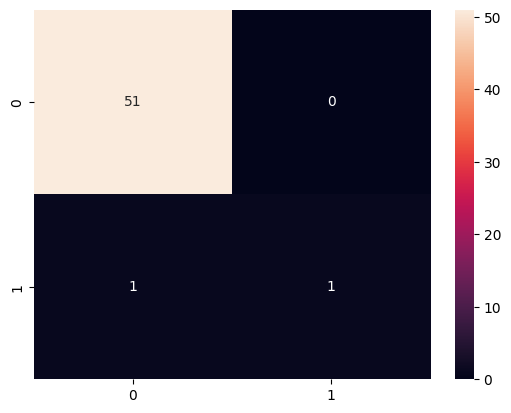

In [104]:
import seaborn as sns
sns.heatmap(kk, annot=True)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(ytest,p1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.50      0.67         2

    accuracy                           0.98        53
   macro avg       0.99      0.75      0.83        53
weighted avg       0.98      0.98      0.98        53



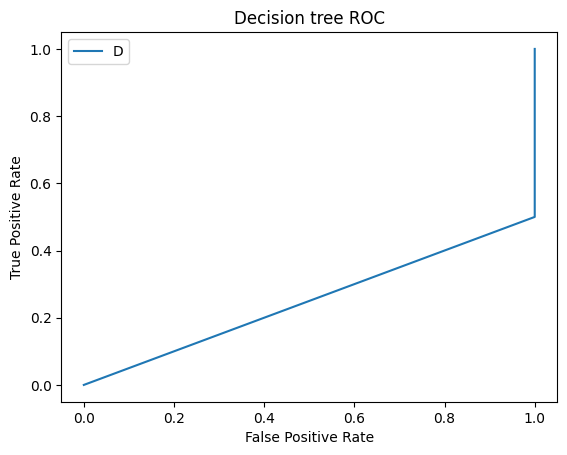

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
dtproba = dt.predict_proba(xtest)
dtproba=dtproba[:,0]
auc=roc_auc_score(ytest,dtproba)
#print(auc)
fpr1, tpr1,thre1= roc_curve(ytest,dtproba)
#fpr
#create ROC curve
#plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr1,tpr1)
plt.legend('Decision_tree ')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision tree ROC')
plt.show()

# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [110]:
knn.predict(xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [111]:
knn.score(xtrain,ytrain)

1.0

In [112]:
pred2=knn.predict(xtest)
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [113]:
from sklearn.metrics import confusion_matrix
knnc=confusion_matrix(ytest,pred2)
from sklearn.metrics import confusion_matrix
kk=confusion_matrix(ytest,pred2)

In [114]:
#from mlxtend.plotting import plot_confusion_matrix

In [115]:
#fig, ax = plot_confusion_matrix(conf_mat=kk, figsize=(6, 6))
#plt.xlabel('Predictions', fontsize=18)
#plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix', fontsize=18)
#plt.show()

<Axes: >

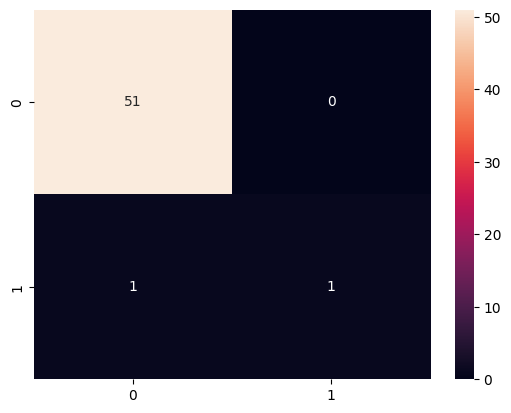

In [116]:
import seaborn as sns
sns.heatmap(knnc, annot=True)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.50      0.67         2

    accuracy                           0.98        53
   macro avg       0.99      0.75      0.83        53
weighted avg       0.98      0.98      0.98        53



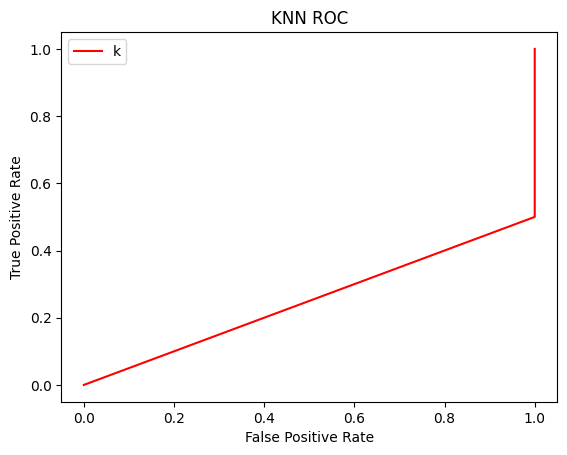

In [118]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
knnproba = knn.predict_proba(xtest)
knnproba=knnproba[:,0]
auc=roc_auc_score(ytest,knnproba)
#print(auc)
fpr2, tpr2,thre2= roc_curve(ytest,knnproba)
#fpr
#create ROC curve
#plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr2,tpr2,c='r')
plt.legend('knn')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('KNN ROC')
plt.show()

# RandomForestClassifier

In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [120]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [121]:
rfc.score(xtrain,ytrain)

1.0

In [122]:
pred3=rfc.predict(xtest)
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred3)


array([[51,  0],
       [ 1,  1]])

In [124]:

from sklearn.metrics import confusion_matrix
rfccn=confusion_matrix(ytest,pred3)

In [125]:
#from mlxtend.plotting import plot_confusion_matrix

In [126]:
#fig, ax = plot_confusion_matrix(conf_mat=kk, figsize=(6, 6))
#plt.xlabel('Predictions', fontsize=18)
#plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix', fontsize=18)
#plt.show()

<Axes: >

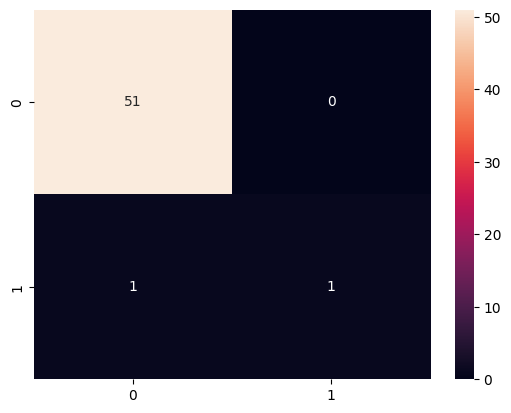

In [127]:
import seaborn as sns
sns.heatmap(rfccn, annot=True)

In [128]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.50      0.67         2

    accuracy                           0.98        53
   macro avg       0.99      0.75      0.83        53
weighted avg       0.98      0.98      0.98        53



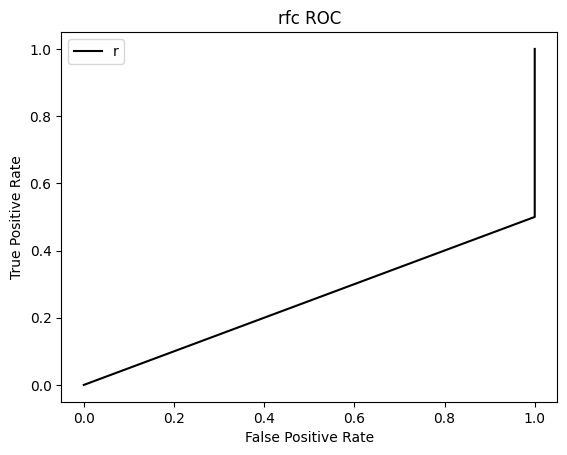

In [129]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
rfcproba = knn.predict_proba(xtest)
rfcproba=rfcproba[:,0]
auc=roc_auc_score(ytest,rfcproba)
#print(auc)
fpr3, tpr3,thre3= roc_curve(ytest,rfcproba)
#fpr
#create ROC curve
#plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr3,tpr3,c='k')
plt.legend('rfc')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('rfc ROC')
plt.show()

# XGBOOST

In [130]:
import xgboost
m=xgboost.XGBClassifier()
m.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [131]:
m.score(xtrain,ytrain)

0.9872611464968153

In [132]:
pred4=m.predict(xtest)
pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [133]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred4))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       0.00      0.00      0.00         2

    accuracy                           0.96        53
   macro avg       0.48      0.50      0.49        53
weighted avg       0.93      0.96      0.94        53



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
from sklearn.metrics import confusion_matrix
xgbcm=confusion_matrix(ytest,pred4)

In [135]:
from sklearn.metrics import confusion_matrix
xgbcm=confusion_matrix(ytest,pred4)


<Axes: >

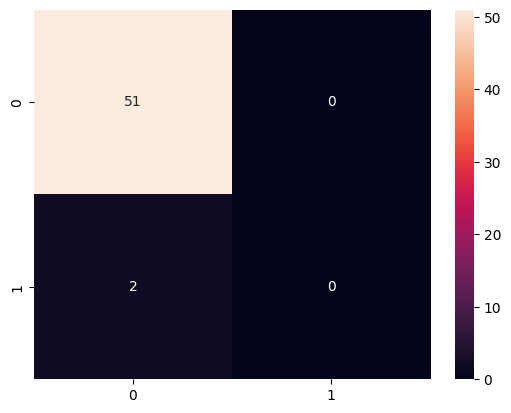

In [136]:
import seaborn as sns
sns.heatmap(xgbcm, annot=True)

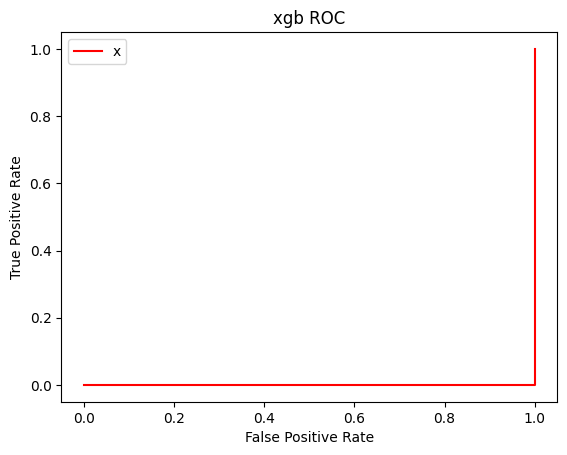

In [137]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
xgbproba = m.predict_proba(xtest)
xgbproba=xgbproba[:,0]
auc=roc_auc_score(ytest,xgbproba)
#print(auc)
fpr4, tpr4,thre4= roc_curve(ytest,xgbproba)
#fpr
#create ROC curve
#plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr4,tpr4,c='r')
plt.legend('xgb')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('xgb ROC')
plt.show()


# GBM

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
m2=GradientBoostingClassifier()
m2.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [139]:
pred5=m2.predict(xtest)
pred5


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [140]:
m2.score(xtest,ytest)

0.9811320754716981

In [141]:
from sklearn.metrics import confusion_matrix
gbmcm=confusion_matrix(ytest,pred5)

<Axes: >

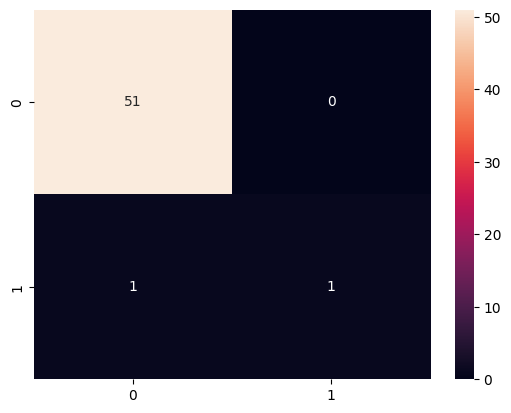

In [142]:
import seaborn as sns
sns.heatmap(gbmcm, annot=True)

In [143]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.50      0.67         2

    accuracy                           0.98        53
   macro avg       0.99      0.75      0.83        53
weighted avg       0.98      0.98      0.98        53



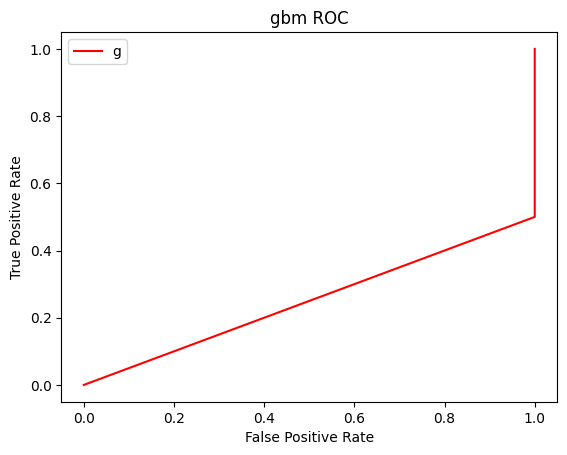

In [144]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
gbmproba = m2.predict_proba(xtest)
gbmproba=gbmproba[:,0]
auc=roc_auc_score(ytest,gbmproba)
#print(auc)
fpr5, tpr5,thre5= roc_curve(ytest,gbmproba)
#fpr
#create ROC curve
#plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr5,tpr5,c='r')
plt.legend('gbm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('gbm ROC')
plt.show()

# LGBM

In [145]:
import lightgbm as ltb

In [146]:
m3 = ltb.LGBMClassifier()
m3.fit(xtrain,ytrain)

LGBMClassifier()

In [147]:
r=m3.predict(xtest)
r

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [148]:
m3.score(xtest,ytest)

0.9622641509433962

In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,r)

array([[51,  0],
       [ 2,  0]])

In [150]:
from sklearn.metrics import confusion_matrix
lgbm=confusion_matrix(ytest,r)

In [151]:
#from mlxtend.plotting import plot_confusion_matrix

In [152]:
#fig, ax = plot_confusion_matrix(conf_mat=kk, figsize=(6, 6))
#plt.xlabel('Predictions', fontsize=18)
#plt.ylabel('Actuals', fontsize=18)
#plt.title('Confusion Matrix', fontsize=18)
#plt.show()

<Axes: >

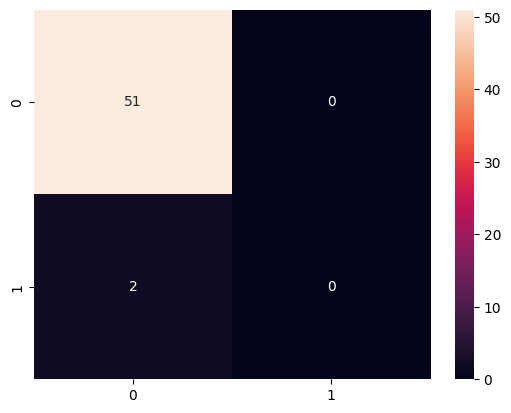

In [153]:
import seaborn as sns
sns.heatmap(lgbm, annot=True)

In [154]:
from sklearn.metrics import classification_report
print(classification_report(ytest,r))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       0.00      0.00      0.00         2

    accuracy                           0.96        53
   macro avg       0.48      0.50      0.49        53
weighted avg       0.93      0.96      0.94        53



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


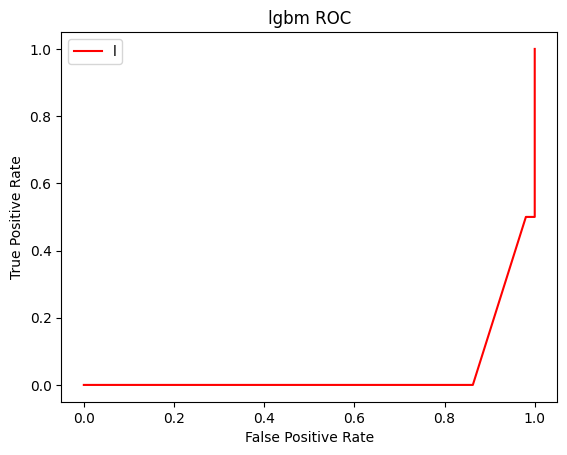

auc= 0.0392156862745098


In [155]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lgbmproba = m3.predict_proba(xtest)
lgbmproba=lgbmproba[:,0]
auc=roc_auc_score(ytest,lgbmproba)
#print(auc)
fpr6, tpr6,thre6= roc_curve(ytest,lgbmproba)
#fpr
#create ROC curve
#plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr6,tpr6,c='r')
plt.legend('lgbm')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('lgbm ROC')
plt.show()
print('auc=',auc)

# All ROC Comparision

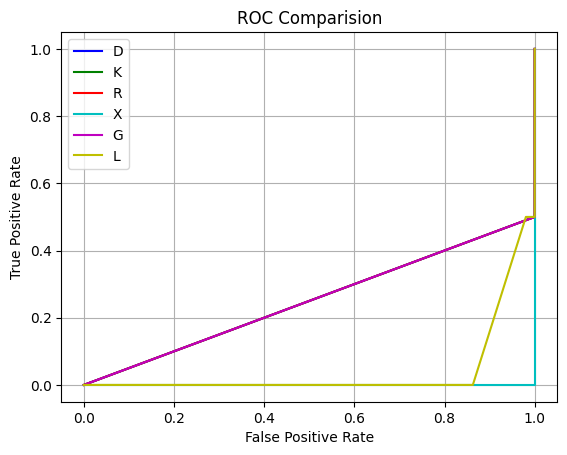

In [156]:
plt.plot(fpr1,tpr1,c='b')
plt.legend('DT')
plt.plot(fpr2,tpr2,c='g')
plt.legend('knn')
plt.plot(fpr3,tpr3,c='r')
plt.legend('rfc')
plt.plot(fpr4,tpr4,c='c')
plt.legend('xgboost')
plt.plot(fpr5,tpr5,c='m')
plt.legend('gbm')
plt.plot(fpr6,tpr6,c='y')
plt.legend('DKRXGL')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Comparision')
plt.show()